# Chicken or Rabbit  |  Use Pymc3
Chapter 22: Fundamentals of Markov Chain Monte Carlo

### Initializations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Prior
Use Dirichlet distribution

In [2]:
alphas = np.array([2,2])
# Dir(2,2), or Beta(2, 2)

### Data

In [3]:
data = np.array([2,3])    # n = 5
# data = np.array([90,110]) # = 200

animals = ['Rabbit', 'Chicken']


### Create model object

In [4]:
with pm.Model() as model:
    
    # prior: Dirichlet distribution
    prior = pm.Dirichlet('parameters', a=alphas, shape = 2)
    
    # likelihood: multinomial distribution
    observed_data = pm.Multinomial('observed_data', 
                                   n = data.sum(), 
                                   p = prior, 
                                   shape = 2, 
                                   observed = data)    
    

### Simulate posterior distribution

In [5]:
with model:
    # 1000 sample data from 2 chains
    # First 200 samples are discarded
    
    trace = pm.sample(draws=1000, chains=2, tune=200, 
                      discard_tuned_samples=True)
    

C:\Users\james\AppData\Roaming\Python\Python39\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [parameters]


Sampling 2 chains for 200 tune and 1_000 draw iterations (400 + 2_000 draws total) took 39 seconds.
The acceptance probability does not match the target. It is 0.8981490595116245, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8960820222640631, but should be close to 0.8. Try to increase the number of tuning steps.


### Print results

In [6]:
summary = pm.summary(trace)
summary.index = animals
summary

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\james\AppData\Roaming\Python\Python39\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Rabbit,0.452,0.157,0.160,0.739,0.006,0.004,684.0,1009.0,1.0
Chicken,0.548,0.157,0.261,0.840,0.006,0.004,684.0,1009.0,1.0


### Posterior distributions

In [7]:
trace_df = pd.DataFrame(trace['parameters'], columns = animals)

In [8]:
trace_df

,Rabbit,Chicken
0,0.440672,0.559328
1,0.194042,0.805958
2,0.196421,0.803579
3,0.534771,0.465229
4,0.556121,0.443879
...,...,...
1995,0.349596,0.650404
1996,0.242285,0.757715
1997,0.370551,0.629449
1998,0.362085,0.637915


C:\Users\james\AppData\Local\Temp\ipykernel_6764\1105742345.py:3: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  ax = pm.traceplot(trace, figsize = (16, 8), combined = True);
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\james\AppData\Roaming\Python\Python39\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


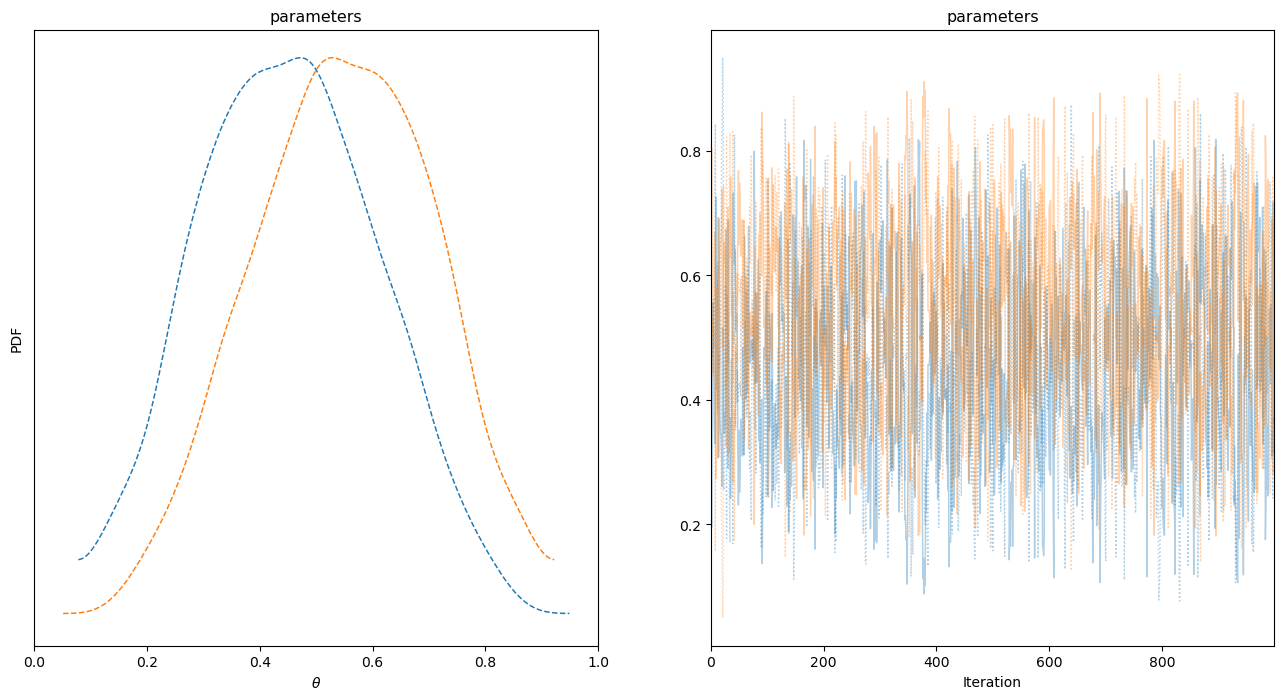

In [9]:
# trace plot

ax = pm.traceplot(trace, figsize = (16, 8), combined = True);
# Flag for combining multiple chains into a single chain. 
# If False (default), chains will be plotted separately

ax[0][0].set_xlabel(r'$\theta$')
ax[0][0].set_ylabel('PDF');
ax[0][0].set_xlim(0,1);
ax[0][1].set_xlabel('Iteration');

plt.savefig('Rabbit_Chicken_Posterior_Trace_plot_5.svg')

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\james\AppData\Roaming\Python\Python39\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


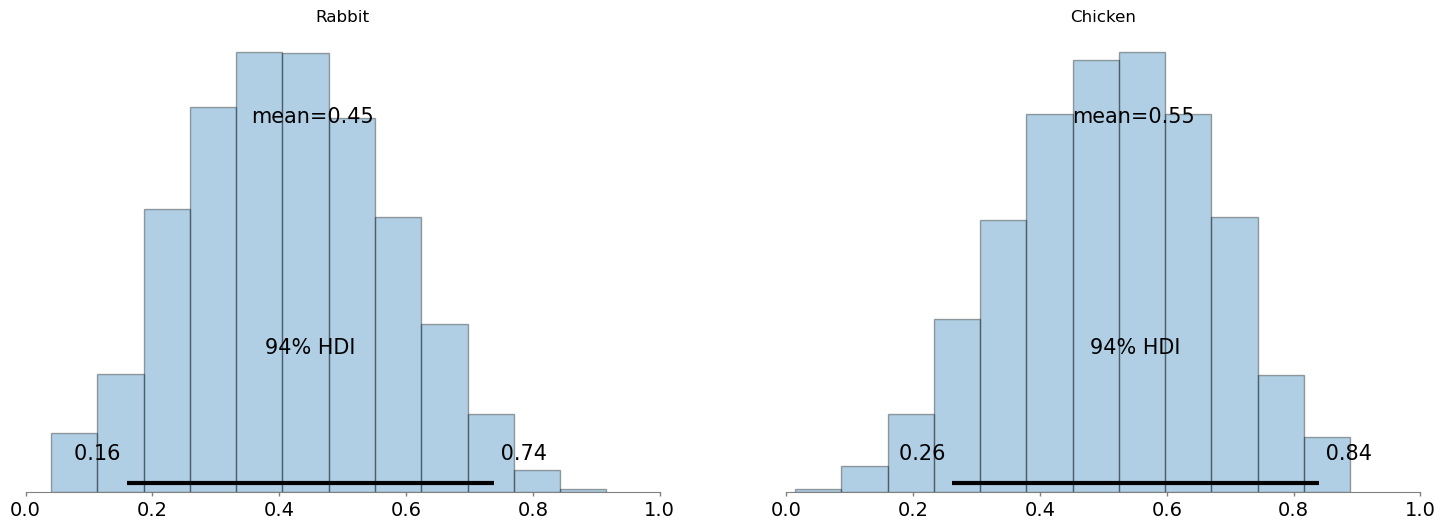

In [10]:
# Posterior hist

ax = pm.plot_posterior(trace, kind="hist",
                       figsize = (18, 6), 
                       edgecolor = 'k');

for i, a in enumerate(animals):
    ax[i].set_title(a)
    ax[i].set_xlim(0,1)

plt.savefig('Rabbit_Chicken_Posterior_Hist_5.svg')

Got error No model on context stack. trying to find log_likelihood in translation.


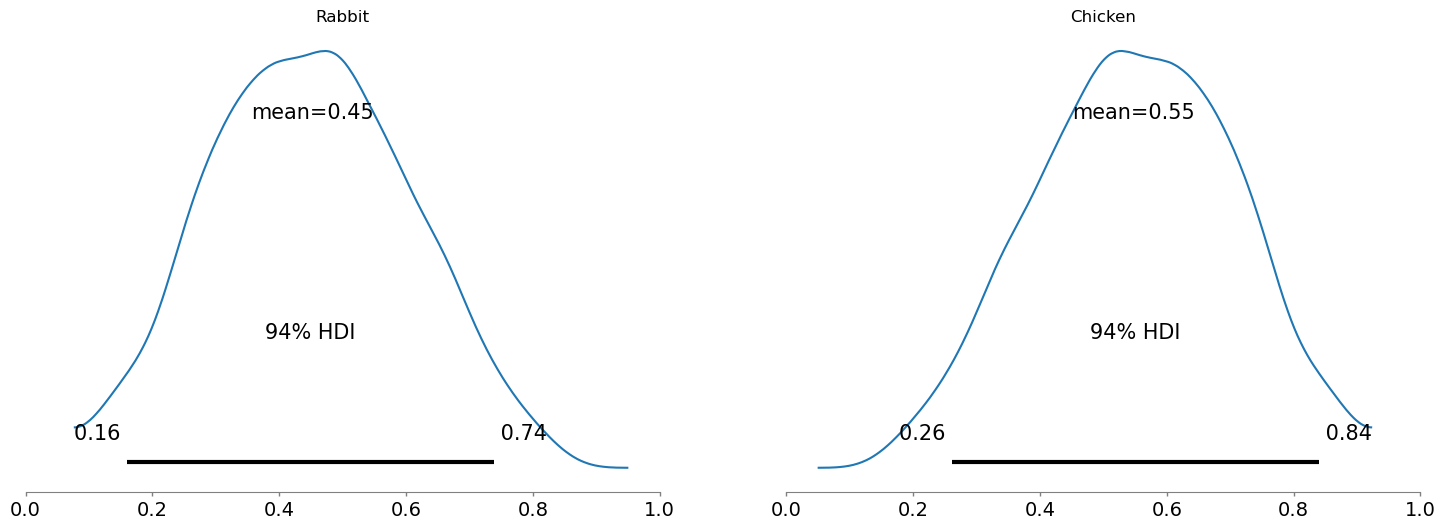

In [11]:
# Posterior KDE
ax = pm.plot_posterior(trace, kind="kde",
                       figsize = (18, 6));

for i, a in enumerate(animals):
    ax[i].set_title(a)
    ax[i].set_xlim(0,1)

plt.savefig('Rabbit_Chicken_Posterior_KDE_5.svg')